In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

print(pd.__version__)

1.0.3


In [340]:
all_data_df=pd.read_csv(os.getcwd()+'/Data/All_Data.csv')
all_data_df.head()

,c5large_size_arr,c5large_num_proc,c5large_time_avg,c5large_time_std,c5large_cpu_ut_avg,c5large_cpu_ut_std,c5xlarge_size_arr,c5xlarge_num_proc,c5xlarge_time_avg,c5xlarge_time_std,...,m52xlarge_time_avg,m52xlarge_time_std,m52xlarge_cpu_ut_avg,m52xlarge_cpu_ut_std,m54xlarge_size_arr,m54xlarge_num_proc,m54xlarge_time_avg,m54xlarge_time_std,m54xlarge_cpu_ut_avg,m54xlarge_cpu_ut_std
0,1.0,1.0,0.001975,0.000489,7.500,23.848480,1.0,1.0,0.002566,0.000620,...,0.002366,0.000362,6.2500,24.20614591,1,1,0.002384,0.000356,0.93750,8.788975694
1,1.0,2.0,0.002731,0.000074,25.000,43.301270,1.0,2.0,0.002808,0.000173,...,0.002817,0.000082,11.2500,31.59806165,1,2,0.002892,0.000042,4.06250,19.34221016
2,1.0,4.0,0.005025,0.000040,47.500,48.669806,1.0,4.0,0.004706,0.000191,...,0.004601,0.000164,15.6250,34.08972536,1,4,0.004354,0.000049,4.06250,19.34221016
3,1.0,8.0,0.010276,0.001023,83.335,35.745241,1.0,8.0,0.008722,0.000605,...,0.008332,0.000526,33.7500,44.56385867,1,8,0.007967,0.000433,12.18750,30.48917585
4,1.0,16.0,0.020079,0.000243,98.335,7.257567,1.0,16.0,0.016030,0.000468,...,0.015340,0.000236,38.4375,37.58115676,1,16,0.014663,0.000111,14.26875,27.50151629


In [3]:
c52xlarge=pd.read_csv(os.getcwd()+'/Data/c52xlarge.csv')
c5xlarge=pd.read_csv(os.getcwd()+'/Data/c5xlarge.csv')
c5large=pd.read_csv(os.getcwd()+'/Data/c5large.csv')
m54xlarge=pd.read_csv(os.getcwd()+'/Data/m54xlarge.csv')
m52xlarge=pd.read_csv(os.getcwd()+'/Data/m52xlarge.csv')
m5xlarge=pd.read_csv(os.getcwd()+'/Data/m5xlarge.csv')
m5large=pd.read_csv(os.getcwd()+'/Data/m5large.csv')
r54xlarge=pd.read_csv(os.getcwd()+'/Data/r54xlarge.csv')
r52xlarge=pd.read_csv(os.getcwd()+'/Data/r52xlarge.csv')
r5xlarge=pd.read_csv(os.getcwd()+'/Data/r5xlarge.csv')
r5large=pd.read_csv(os.getcwd()+'/Data/r5large.csv')

In [4]:
c5large_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c5large.npz')
c5xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c5xlarge.npz')
c52xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c52xlarge.npz')
r5large_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r5large.npz')
r5xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r5xlarge.npz')
r52xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r52xlarge.npz')
r54xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r54xlarge.npz')

In [8]:
list(r5large_raw.keys())

['cpu', 'times']

In [27]:
r5large_raw['times'][0:2].shape

(2, 10)

# Plot 1
Box plot comparing performance (measured by our proxy of time per process) as a function of the size of the ec2 process.  As expected we see the time per process decreases with the size of the process.

Text(0.5, 1.0, 'N = 128, num proc = 20')

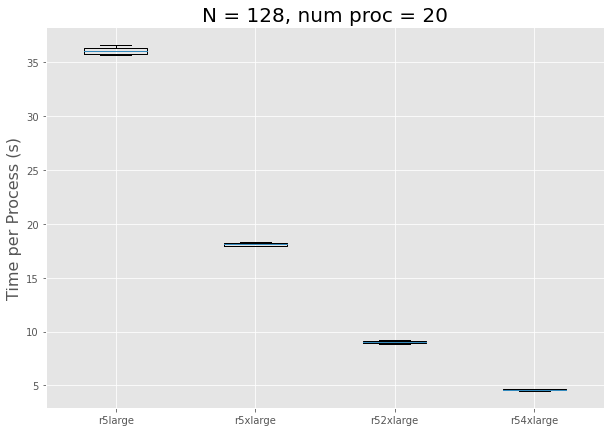

In [60]:
data = np.vstack((r5large_raw['times'][46].T,
                  r5xlarge_raw['times'][46].T,
                  r52xlarge_raw['times'][46].T,
                  r54xlarge_raw['times'][46].T))
fig, ax = plt.subplots(figsize = (10,7))
labels = ['r5large', 'r5xlarge', 'r52xlarge', 'r54xlarge']
ax.boxplot(data.T, labels = labels)
ax.set_ylabel('Time per Process (s)', fontsize = 16)
ax.set_title('N = 128, num proc = 20', fontsize = 20)

Text(0.5, 1.0, 'N = 128, num proc = 20')

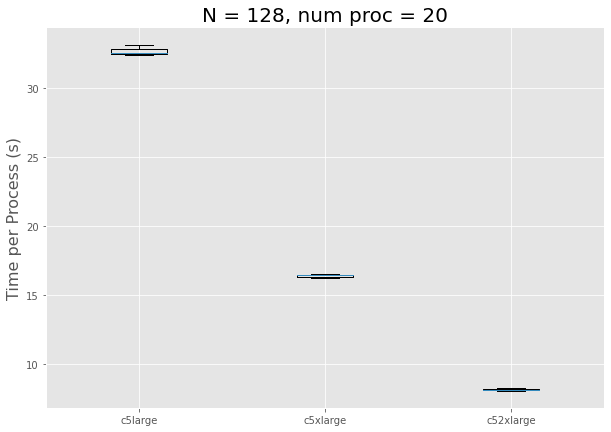

In [179]:
data = np.vstack((c5large_raw['times'][46].T,
                  c5xlarge_raw['times'][46].T,
                  c52xlarge_raw['times'][46].T))
fig, ax = plt.subplots(figsize = (10,7))
labels = ['c5large', 'c5xlarge', 'c52xlarge']
ax.boxplot(data.T, labels = labels)
ax.set_ylabel('Time per Process (s)', fontsize = 16)
ax.set_title('N = 128, num proc = 20', fontsize = 20)

# Plot 2

Comparing process types we see c-type processes handle heavier process loads than r types

Text(0.5, 1.0, 'N = 128, num proc = 20')

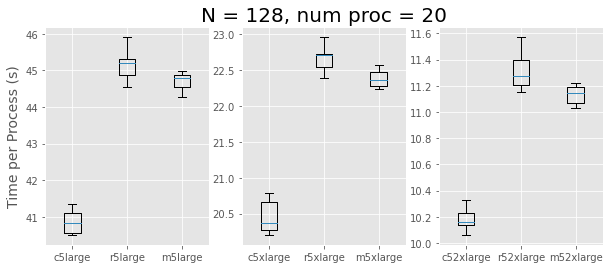

In [278]:
ind = 47
data_large = np.vstack((c5large_raw['times'][ind].T,
                        r5large_raw['times'][ind].T,
                        np.random.normal(loc=m5large['time_avg'].iloc[ind],
                        scale=m5large['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_large = ['c5large', 'r5large', 'm5large']

data_xlarge = np.vstack((c5xlarge_raw['times'][ind].T,
                        r5xlarge_raw['times'][ind].T,
                        np.random.normal(loc=m5xlarge['time_avg'].iloc[ind],
                        scale=m5xlarge['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_xlarge = ['c5xlarge', 'r5xlarge', 'm5xlarge']

data_2xlarge = np.vstack((c52xlarge_raw['times'][ind].T,
                          r52xlarge_raw['times'][ind].T,
                          np.random.normal(loc=m52xlarge['time_avg'].iloc[ind],
                          scale=m52xlarge['time_std'].iloc[ind],
                          size = (10,1)).T))
labels_2xlarge = ['c52xlarge', 'r52xlarge', 'm52xlarge']

fig, ax = plt.subplots(1, 3, figsize = (10,4))

ax[0].boxplot(data_large.T, labels = labels_large)
ax[1].boxplot(data_xlarge.T, labels = labels_xlarge)
ax[2].boxplot(data_2xlarge.T, labels = labels_2xlarge)
ax[0].set_ylabel('Time per Process (s)', fontsize = 14)
ax[1].set_title('N = 128, num proc = 20', fontsize = 20)

Text(0.5, 1.0, 'N = 64, num proc = 20')

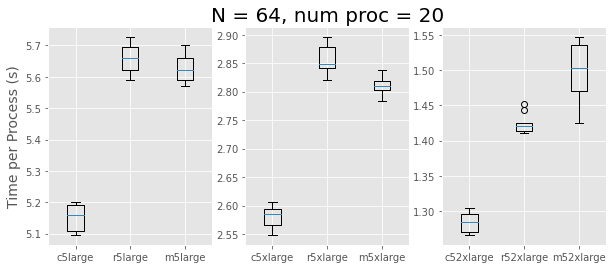

In [285]:
ind = 41
data_large = np.vstack((c5large_raw['times'][ind].T,
                        r5large_raw['times'][ind].T,
                        np.random.normal(loc=m5large['time_avg'].iloc[ind],
                        scale=m5large['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_large = ['c5large', 'r5large', 'm5large']

data_xlarge = np.vstack((c5xlarge_raw['times'][ind].T,
                        r5xlarge_raw['times'][ind].T,
                        np.random.normal(loc=m5xlarge['time_avg'].iloc[ind],
                        scale=m5xlarge['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_xlarge = ['c5xlarge', 'r5xlarge', 'm5xlarge']

data_2xlarge = np.vstack((c52xlarge_raw['times'][ind].T,
                          r52xlarge_raw['times'][ind].T,
                          np.random.normal(loc=m52xlarge['time_avg'].iloc[ind],
                          scale=m52xlarge['time_std'].iloc[ind],
                          size = (10,1)).T))
labels_2xlarge = ['c52xlarge', 'r52xlarge', 'm52xlarge']

fig, ax = plt.subplots(1, 3, figsize = (10,4))

ax[0].boxplot(data_large.T, labels = labels_large)
ax[1].boxplot(data_xlarge.T, labels = labels_xlarge)
ax[2].boxplot(data_2xlarge.T, labels = labels_2xlarge)
ax[0].set_ylabel('Time per Process (s)', fontsize = 14)
ax[1].set_title('N = 64, num proc = 20', fontsize = 20)

Text(0.5, 1.0, 'Complexity of Matrix Multiplication num_proc = 20')

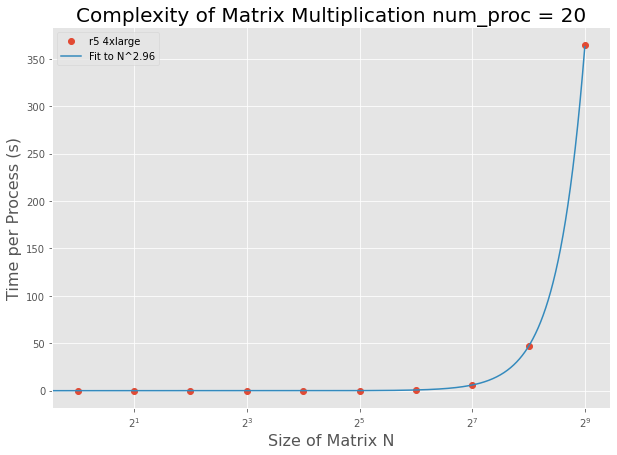

In [341]:
from scipy.optimize import curve_fit
x = np.power(2*np.ones(10), range(10))
data = r54xlarge_raw['times']
data = np.mean(data[5::6], axis = 1)

power_fit = lambda x, a, b, c: a*np.power(x, b)+c
popt, pcov = curve_fit(power_fit, x, data)

fig = plt.figure(figsize = (10,7))
plt.plot(x, data, 'o', label = 'r5 4xlarge')
plt.plot(np.arange(2**9), power_fit(np.arange(2**9), *popt),
        label = 'Fit to N^{:.2f}'.format(popt[1]))
plt.legend()
plt.xscale('log', basex = 2)
# plt.yscale('log', basey = 2)
plt.xlabel('Size of Matrix N', fontsize = 16)
plt.ylabel('Time per Process (s)', fontsize = 16)
plt.title('Complexity of Matrix Multiplication num_proc = 20', fontsize = 20)

Text(0.5, 1.0, 'Complexity of Matrix Multiplication num_proc = 20')

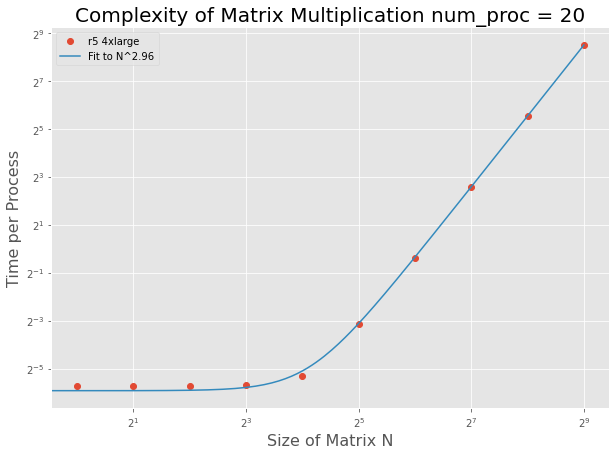

In [339]:
x = np.power(2*np.ones(10), range(10))

fig = plt.figure(figsize = (10,7))
plt.plot(x, data, 'o', label = 'r5 4xlarge')
plt.plot(np.arange(2**9), power_fit(np.arange(2**9), *popt),
        label = 'Fit to N^{:.2f}'.format(popt[1]))
plt.legend()
plt.xscale('log', basex = 2)
plt.yscale('log', basey = 2)
plt.xlabel('Size of Matrix N', fontsize = 16)
plt.ylabel('Time per Process', fontsize = 16)
plt.title('Complexity of Matrix Multiplication num_proc = 20', fontsize = 20)